# 3 Effekt från solceller - Modul 4: numerisk integrering (och lite om Modul 3: kurvanpassning)

## 3.a)
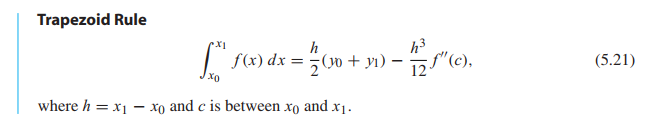
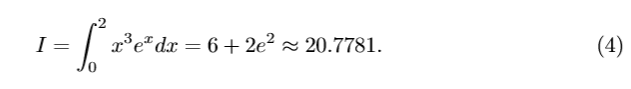

In [16]:
import numpy as np

from tabulate import tabulate
from trapets import trapets
from typing import Callable
from dataclasses import dataclass

In [ ]:
def test_func(x: float) -> Callable:
    return x**3 * np.exp(x)


bounds: list = [0, 2]
n = np.int64(1e6)
I_t, h = trapets(test_func, n, bounds, True) # type: ignore
print(f"Trapezoidal approximation I_t = {I_t:2.10f}")


Trapezoidal approximation I_t = 20.7781121979


## 3.b) Convergence analysis

In [18]:
I_exact: float = 6 + 2 * np.exp(2)
print(f"Exact value of I = {I_exact:2.10f}")


@dataclass
class ConvergenceResults:
    n: list[int]
    h: list[float]
    y: list[float]
    error: list[float]


results = ConvergenceResults(n=[], h=[], y=[], error=[])

steps: np.ndarray = 2 ** np.arange(1, 24, dtype=int)  # Equidistant steps (doubles)

for step in steps:
    y_t, h = trapets(f=test_func, n=step, boundaries=bounds, return_h=True)  # type: ignore
    results.n.append(step)
    results.h.append(h)
    results.y.append(y_t)
    results.error.append(np.abs(I_exact - y_t))


# h_ratio = np.array(results.h[:-1]) / np.array(results.h[1:]) # Since we halve the steps this is = 2 at all times h_1 = 2*h_2, hence log_2
p_order = np.log2(np.array(results.error[:-1]) / np.array(results.error[1:]))


table_data = []
for i in range(len(results.n)):
    if i < len(p_order):
        p_str = f"{p_order[i]:.3f}"
    else:
        p_str = "No Pair"

    table_data.append(
        [
            results.n[i],
            f"{results.h[i]:.6f}",
            f"{results.y[i]:.8f}",
            f"{results.error[i]:.6f}",
            p_str,
        ]
    )

headers = ["n", "h", "T_h", "e_h", "p ≈"]
print("\n" + tabulate(table_data, headers=headers, tablefmt="fancy_grid"))


Exact value of I = 20.7781121979

╒══════════════════╤══════════╤═════════╤═══════════╤═════════╕
│                n │        h │     T_h │       e_h │ p ≈     │
╞══════════════════╪══════════╪═════════╪═══════════╪═════════╡
│      2           │ 1        │ 32.2745 │ 11.4964   │ 1.926   │
├──────────────────┼──────────┼─────────┼───────────┼─────────┤
│      4           │ 0.5      │ 23.8031 │  3.02504  │ 1.981   │
├──────────────────┼──────────┼─────────┼───────────┼─────────┤
│      8           │ 0.25     │ 21.5444 │  0.766293 │ 1.995   │
├──────────────────┼──────────┼─────────┼───────────┼─────────┤
│     16           │ 0.125    │ 20.9703 │  0.19221  │ 1.999   │
├──────────────────┼──────────┼─────────┼───────────┼─────────┤
│     32           │ 0.0625   │ 20.8262 │  0.048092 │ 2.000   │
├──────────────────┼──────────┼─────────┼───────────┼─────────┤
│     64           │ 0.03125  │ 20.7901 │  0.012026 │ 2.000   │
├──────────────────┼──────────┼─────────┼───────────┼─────────┤
│    1

## 3.c)

In [ ]:
t = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
f_t = np.array([12.00, 15.10, 19.01, 23.92, 30.11, 37.90, 47.70, 60.03, 75.56])
bounds = [2014, 2022]


def f_solar_cells(x):
    return np.interp(x, t, f_t)


energy, h = trapets(f=f_solar_cells, n=8, boundaries=bounds, return_h=True)  # type: ignore


print(f"Total energy 2014-2022: {energy:.2f} kWyear")
print(f"Mean energy: {energy / 8:.2f} kWyear")


Total energy 2014-2022: 277.55 kWyear
Mean energy: 34.69 kWyear


## 3.d)



In [ ]:
n_vals = [1, 2, 4, 8]

results = ConvergenceResults(n=[], h=[], y=[], error=[])

for i, n in enumerate(n_vals):
    I_n, h_n = trapets(f_solar_cells, n, boundaries=[2014, 2022], return_h=True)  # type: ignore
    results.n.append(n)
    results.h.append(h_n)
    results.y.append(I_n)

    if i > 0:
        e_2h = np.abs(I_n - results.y[-2])
        results.error.append(e_2h)
    else:
        results.error.append(np.nan)

p_order = np.log2(np.array(results.error[:-1]) / np.array(results.error[1:]))

table_data = []

for i in range(len(results.n)):
    p_str = f"{p_order[i]:.2f}" if i < len(p_order) else "No Pair"
    table_data.append(
        [
            results.n[i],
            f"{results.h[i]:5.2f}",
            f"{results.y[i]:7.2f}",
            f"{results.error[i]:7.4f}",
            p_str,
        ]
    )

print(
    tabulate(
        table_data,
        headers=["n", "h [year]", "T_h [kWyear]", "e_{2h}", "p"],
        tablefmt="fancy_grid",
    )
)

╒═════╤════════════╤════════════════╤══════════╤═════════╕
│   n │   h [year] │   T_h [kWyear] │ e_{2h}   │ p       │
╞═════╪════════════╪════════════════╪══════════╪═════════╡
│   1 │          8 │         350.24 │ nan      │ nan     │
├─────┼────────────┼────────────────┼──────────┼─────────┤
│   2 │          4 │         295.56 │ 54.6800  │ 1.93    │
├─────┼────────────┼────────────────┼──────────┼─────────┤
│   4 │          2 │         281.2  │ 14.3600  │ 1.98    │
├─────┼────────────┼────────────────┼──────────┼─────────┤
│   8 │          1 │         277.55 │ 3.6500   │ No Pair │
╘═════╧════════════╧════════════════╧══════════╧═════════╛


## 3.e)
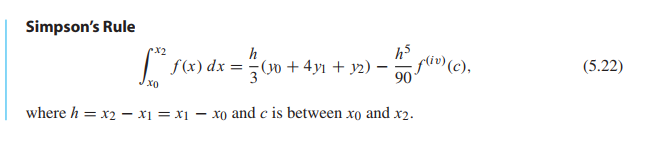
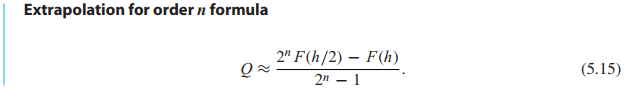

In [ ]:
# Richardson
T_h = results.y[-1]  # 277.55 kWyear
T_2h = results.y[-2]  # 281.2 kWyear
I_R = (4 * T_h - T_2h) / 3  # For trapezoid 2^2 - 1 = 3
print(f"I_R = {I_R} kWyear")

# Simpsons
h = 1


def Simpsons(h: float, y: list) -> float:
    return (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])


I_S = Simpsons(h, f_t)  # type: ignore
print(f"I_S = {I_S} kWyear")


I_R = 276.3333333333333 kWyear
I_S = 276.3333333333333 kWyear


## 3.f) 


In [22]:
# log(model) = np.log(a) + b * (t - 2014) -> polynomial of degree 1

x = t - 2014
y = np.log(f_t)

A_v = np.vander(x, 2, increasing=True)

ln_a, b = np.linalg.solve(A_v.T @ A_v, A_v.T @ y)

a = np.exp(ln_a)

print(f"a = {a:1.6}, b = {b:1.6}")


a = 11.999, b = 0.230012


## 3.g)

In [ ]:
def exp_model(t: int) -> Callable:
    return a * np.exp(b * (t - 2014))


f_2023 = exp_model(2023)
print(f"Energy 2023 = {f_2023} kW")
f_t_extended = np.append(f_t, f_2023)  # type: ignore
t_extended = np.append(t, 2023)

n = int(1e6)

I_T = trapets(exp_model, n, [2014, 2023])
print(f"Total energy between 2014 - 2023 = {I_T} kWyear")


Energy 2023 = 95.09954113019509 kW
Total energy between 2014 - 2023 = 361.28860433194563 kWyear


# Answer 3.g) 
The condition for total amount > 350 kWyears is fulfilled.